<a href="https://colab.research.google.com/github/GVGunasekhar/Data_science-/blob/main/Mini_Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Selenium to load the whole page and extract the data.

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver/usr/bin

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
from selenium.common.exceptions import TimeoutException
import time

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,422 kB]
Get:14 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [51.8 kB]
Fetched 1,730 kB in 2s (780 kB/s)

In [ ]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [ ]:
driver = webdriver.Chrome(options=options)

In [ ]:
driver.get("https://www.cars24.com/buy-used-cars-mumbai")

In [ ]:
previous_results_count = 0

while True:
    # Scroll down to load more results
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait for new results to load
    WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CLASS_NAME, "_2YB7p"))
    )

    # Extract the results
    results = driver.find_elements(By.CLASS_NAME, "_2YB7p")
    results_count = len(results)

    # Print the number of results for debugging
    print(f"Number of results: {results_count}")

    # Check if there are no new results
    if results_count == previous_results_count:
        break

    # Update previous results count
    previous_results_count = results_count

    #delay before scrolling again
    time.sleep(2)
    page_source = driver.page_source

#close the webdriver
driver.quit()

Number of results: 20
Number of results: 40
Number of results: 80
Number of results: 120
Number of results: 160
Number of results: 200
Number of results: 220
Number of results: 280
Number of results: 320
Number of results: 340
Number of results: 380
Number of results: 400
Number of results: 460
Number of results: 480
Number of results: 520
Number of results: 540
Number of results: 580
Number of results: 605
Number of results: 605


In [ ]:
soup = BeautifulSoup(page_source, 'html.parser')

In [ ]:
soup

<html lang="en-IN"><head>
<link href="https://assets.cars24.com" rel="preconnect"/>
<link href="https://fastly-production.24c.in" rel="preconnect"/>
<link href="https://connect.facebook.net" rel="preconnect"/>
<link href="https://www.googletagmanager.com" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://analytics.twitter.com" rel="preconnect"/>
<link href="https://www.facebook.com" rel="preconnect"/>
<link href="https://www.google.com" rel="preconnect"/>
<link href="https://www.google.co.in" rel="preconnect"/>
<link href="https://googleads.g.doubleclick.net" rel="preconnect"/>
<link href="https://t.co" rel="preconnect"/>
<link href="https://static.ads-twitter.com" rel="preconnect"/>
<link href="https://tracking.cars24.com" rel="preconnect"/>
<link href="https://www.googleoptimize.com" rel="preconnect"/>
<link href="https://web-sdk.smartlook.com" rel="preconnect"/><meta charset="utf-8"/><meta content="width=device-width, initial-sca

In [ ]:
results = soup.find_all("div", {"class": "_2YB7p"})

In [ ]:
results

[<div class="_2YB7p"><h3 class="_11dVb">2019 Maruti New Wagon-R LXI CNG 1.0</h3><ul class="_3J2G-"><li>86,195 km</li><li class="_3W_AJ"></li><li>CNG</li><li class="_3W_AJ"></li><li>Manual</li></ul><span class="_3JoYA">Low run cost</span><div class="_2KyOK"><strong class="_3RL-I">₹4.79 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹9,356/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Mulund West, Mumbai 
 </span></p></div>,
 <div class="_2YB7p"><h3 class="_11dVb">2018 Hyundai Elite i20 ASTA 1.2  CVT</h3><ul class="_3J2G-"><li>29,769 km</li><li class="_3W_AJ"></li><li>Petrol</li><li class="_3W_AJ"></li><li>Automatic</li></ul><span class="_3JoYA">Fancy reg. no.</span><div class="_2KyOK"><strong class="_3RL-I">₹6.15 Lakh</strong></div><div class="-EPGU"><span class="_2O0yU">EMIs from ₹12,023/month</span></div><p class="_3dGMY">Free Test Drive <span>Today<!-- --> </span> <!-- --> at <span>Mulund West, Mumbai 
 </span>

In [ ]:
len(results)

605

# Extract Required Data from Results

In [ ]:
car_data = []
if results:
        for idx, result in enumerate(results, start=1):
            car_name = result.find("h3").get_text()
            car_detail = result.find("li").get_text()
            car_price = result.find("strong").get_text()

            # Extract list items from ul
            ul_element = result.find("ul", {'class': '_3J2G-'})
            if ul_element:
                details = [li.get_text() for li in ul_element.find_all("li")]
                filtered_list = [item for item in details if item]

                if len(filtered_list) >= 3:
                    car_detail = filtered_list[0]
                    type_of_fuel = filtered_list[1]
                    gear_system = filtered_list[2]
                else:
                    type_of_fuel = "N/A"
                    gear_system = "N/A"
            else:
                car_detail = "N/A"
                type_of_fuel = "N/A"
                gear_system = "N/A"

            # Extract location
            para_element = result.find("p", {'class': '_3dGMY'})
            if para_element:
                location = para_element.get_text()
                words = location.split()
                words = words[-2:]
                location = ', '.join(words)
            else:
                location = "N/A"

            # Append the car data to the list
            car_data.append([idx, car_name, car_detail, car_price, type_of_fuel, gear_system, location])
            columns = ['Index', 'Car Name', 'Car Detail', 'Car Price', 'Type of Fuel', 'Gear System', 'Location']
            df = pd.DataFrame(car_data, columns=columns)
            # Save the DataFrame to a CSV file
            df.to_csv('data.csv', index=False)
else:
    print("No results found.")

# Filter Specific Brand Cars

In [ ]:
import pandas as pd

#Load the data
file_path = '/content/data.csv'
data = pd.read_csv(file_path)

#Filter the data for a specific car brand

car_brand = input("Enter the Car Brand you want to filter out.") # change brandname for diffrent filtered deatils
filtered_data = data[data['Car Name'].str.contains(car_brand, case=False, na=False)]

# Display the filtered data to verify contents
print(f"\nFirst few rows of data for {car_brand} cars:")
car_brand = car_brand.capitalize()
print(filtered_data.head())

#Save the data
output_file_path = f'{car_brand}_cars_data.csv'
filtered_data.to_csv(output_file_path, index=False)

print(f"\nFiltered data saved to {output_file_path}")


Enter the Car Brand you want to filter out.TATA

First few rows of data for TATA cars:
    Index                           Car Name Car Detail    Car Price  \
13     14  2021 Tata NEXON XM SUNROOF PETROL  36,460 km   ₹7.73 Lakh   
43     44          2019 Tata Harrier XZ 2.0L  57,037 km  ₹12.84 Lakh   
45     46        2023 Tata TIGOR XZ PLUS CNG   3,817 km   ₹7.91 Lakh   
54     55          2021 Tata Tiago XE PETROL  10,232 km   ₹5.44 Lakh   
56     57          2022 Tata NEXON XM PETROL   5,448 km   ₹8.10 Lakh   

   Type of Fuel Gear System           Location  
13       Petrol      Manual      West,, Mumbai  
43       Diesel      Manual  Goregaon,, Mumbai  
45          CNG      Manual  Goregaon,, Mumbai  
54       Petrol      Manual  Goregaon,, Mumbai  
56       Petrol      Manual      West,, Mumbai  

Filtered data saved to Tata_cars_data.csv


# CLEANING & ANALYSIS ON TOTAL CAR DATA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#load the CSV data into a DataFrame
file_path = '/content/data.csv'
data = pd.read_csv(file_path)

#display basic info
print("Dataset Information:")
print(data.info())
print("\nFirst few rows of the dataset:")
print(data.head())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         606 non-null    int64 
 1   Car Name      606 non-null    object
 2   Car Detail    606 non-null    object
 3   Car Price     606 non-null    object
 4   Type of Fuel  606 non-null    object
 5   Gear System   606 non-null    object
 6   Location      522 non-null    object
dtypes: int64(1), object(6)
memory usage: 33.3+ KB
None

First few rows of the dataset:
   Index                                       Car Name Car Detail  \
0      1            2019 Maruti New Wagon-R LXI CNG 1.0  86,195 km   
1      2           2018 Hyundai Elite i20 ASTA 1.2  CVT  29,769 km   
2      3          2019 Volkswagen Ameo COMFORTLINE 1.0L  34,651 km   
3      4  2014 Hyundai Grand i10 ASTA AT 1.2 KAPPA VTVT  33,172 km   
4      5           2018 Hyundai Elite i20 ASTA 1.2  CVT  29

In [ ]:
def clean_price(price_str):
    if pd.isna(price_str):
        return None
    try:
        price_str = price_str.replace('₹', '').replace(' Lakh', '').replace(',', '')
        return float(price_str) * 100000
    except:
        return None

In [ ]:
def clean_mileage(mileage_str):
    if pd.isna(mileage_str):
        return None
    try:
        return int(mileage_str.replace(' km', '').replace(',', ''))
    except:
        return None

In [ ]:
data['Car Price'] = data['Car Price'].apply(clean_price)
data['Car Detail'] = data['Car Detail'].apply(clean_mileage)

In [ ]:
data = data.dropna(subset=['Car Price', 'Car Detail'])

In [ ]:
print("\nMissing values:")
print(data.isna().sum())


Missing values:
Index            0
Car Name         0
Car Detail       0
Car Price        0
Type of Fuel     0
Gear System      0
Location        84
dtype: int64


In [ ]:
def format_lakh(x, pos):
    if x >= 100000:
        return f'₹{x / 100000:.1f} Lakh'
    else:
        return f'₹{x:.0f}'

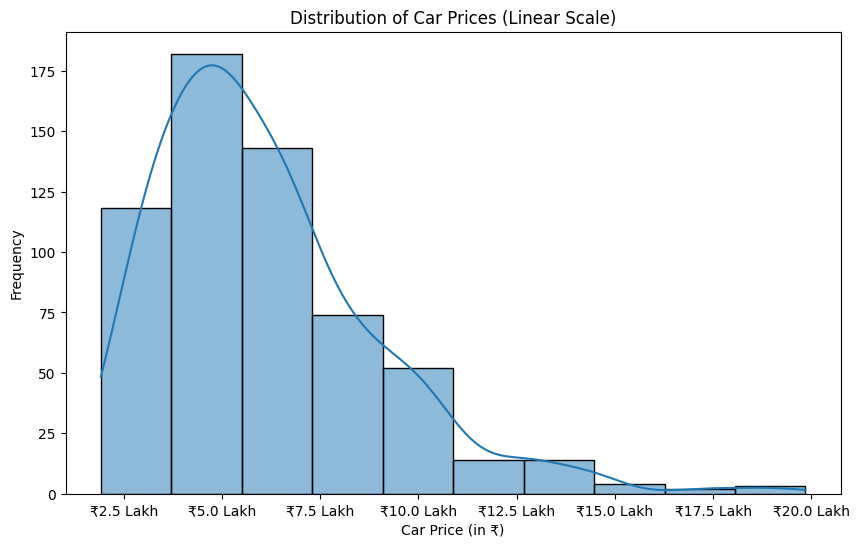

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Car Price'], bins=10, kde=True)
plt.title('Distribution of Car Prices (Linear Scale)')
plt.xlabel('Car Price (in ₹)')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_lakh))
plt.show()

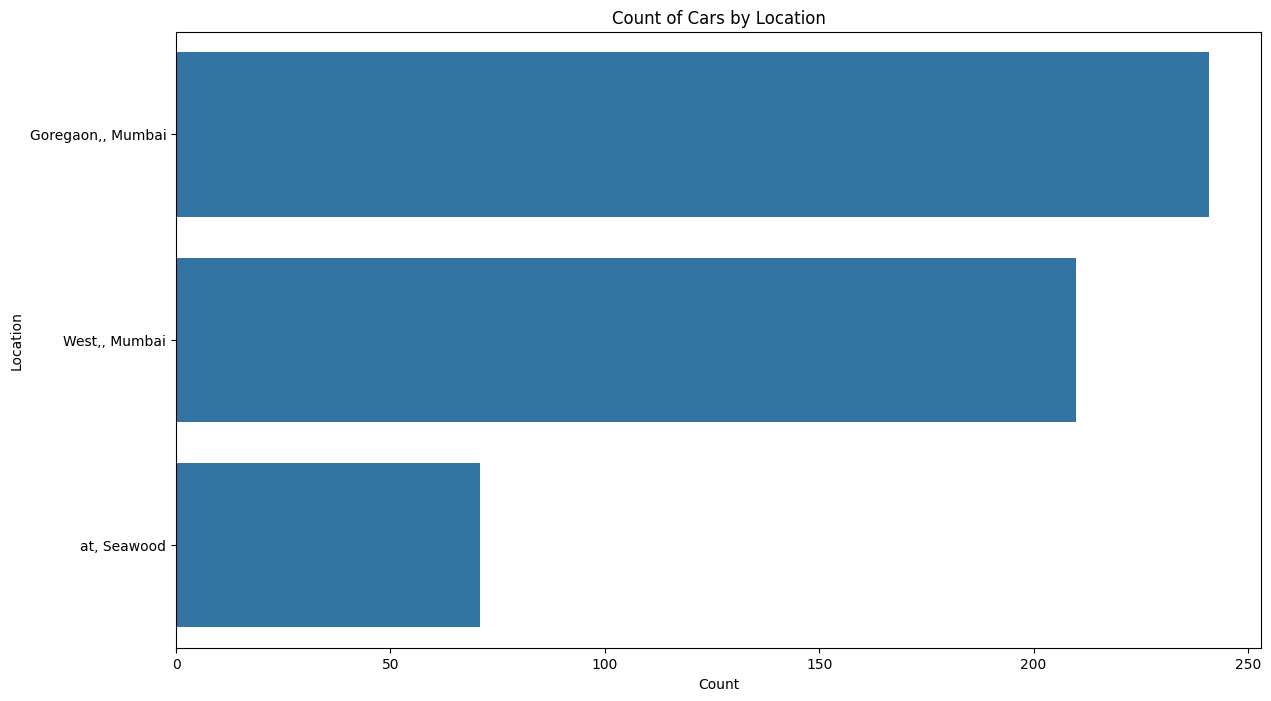

In [ ]:
#Count of Cars by Location
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='Location', order=data['Location'].value_counts().index)
plt.title('Count of Cars by Location')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

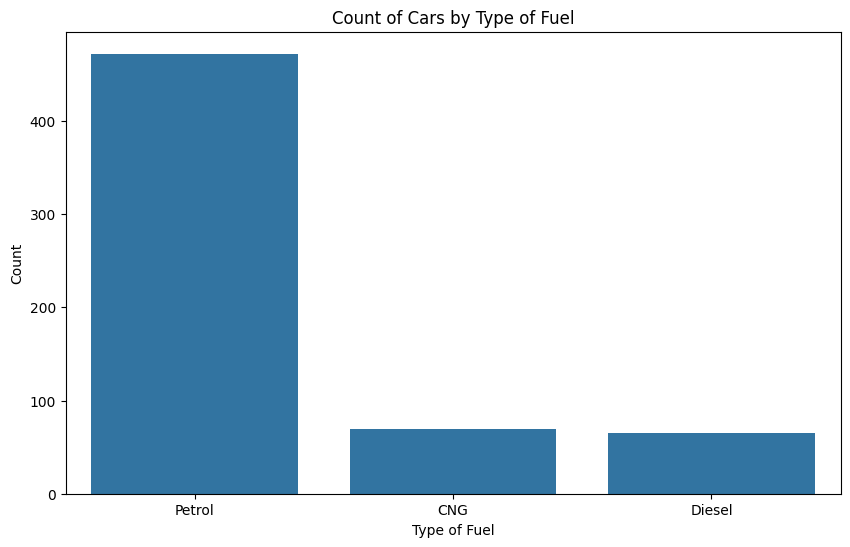

In [ ]:
#Count of Cars by Type of Fuel
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Type of Fuel', order=data['Type of Fuel'].value_counts().index)
plt.title('Count of Cars by Type of Fuel')
plt.xlabel('Type of Fuel')
plt.ylabel('Count')
plt.show()

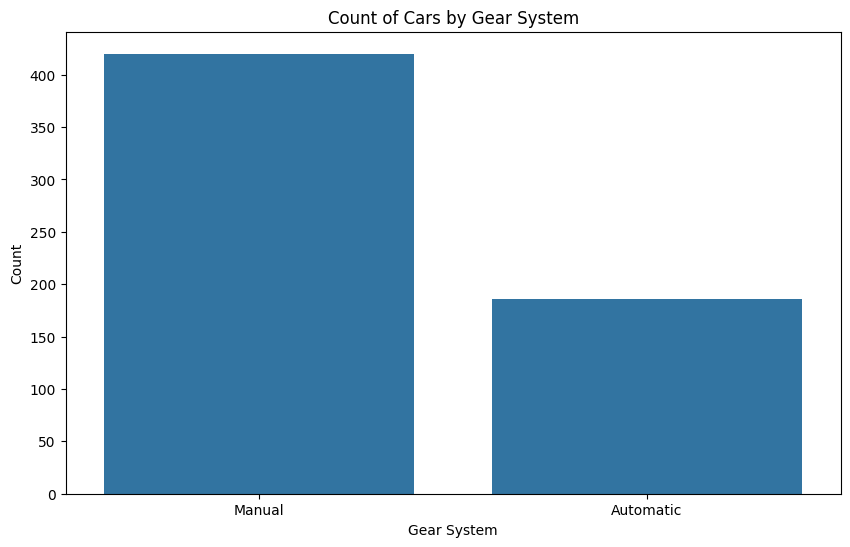

In [ ]:
#Count of Cars by Gear System
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Gear System', order=data['Gear System'].value_counts().index)
plt.title('Count of Cars by Gear System')
plt.xlabel('Gear System')
plt.ylabel('Count')
plt.show()